* 군집 잘됐는지 안했는지 실루엣으로 할 수 있음

# sklearn.cluster.KMeans
* k평균 
- 가장널리 사용되는 군집 알고리즘 중 하나.
- 데이터셋을 K의 군집으로 나눈다. K는 하이퍼파라미터로 사용자가 지정한다.
- 군집의 중심이 될 것 같은 임의의 지점을 선택해 해당중심에 가장 가까운 포인트들을 선택한다.
<br/><br/>
-----------------------------------------------
<br/>
-n_clusters: 군집화할 수, 즉 군집 중심점의 개수를 의미합니다.<br/>
-init: 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++방식으로 최초 설정합니다.<br/>
-n_init: 서로 다른 군집 중심점(centroid)을 최초 셋팅한다.<br/>
-max_iter: 최대 반복 횟수, 이 횟수 이전 모든 데이터의 중심점 이동이 없으면 종료<br/>


In [5]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [6]:
iris=load_iris()
#피처 데이터만 별도로 저장

irisDF= pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
print(irisDF.shape)
irisDF.head(3)

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [19]:
# kmeands 객체 생성
kmeans=KMeans(n_clusters=2,init='k-means++',max_iter=300,random_state=0)

# 붓꽃데이터에 군집화 수행
kmeans.fit(irisDF)
kmeans

KMeans(n_clusters=2, random_state=0)

In [20]:
# 각데이터들마다 centroid(군집 중심점) 할당됨

print(kmeans.labels_)

irisDF['cluster']=kmeans.labels_


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [21]:
# 타겟 별 군집 중심점 확인
irisDF['target']=iris.target
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       0          50
1       0           1
        1          49
2       1          50
Name: sepal_length, dtype: int64


In [22]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)

pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949


In [23]:
# cluster 값이 0,1,2 인 경우마다 별도의 index로 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

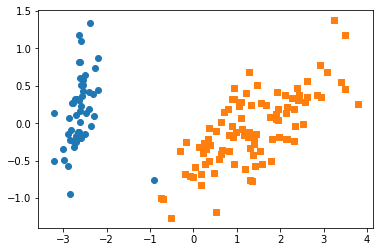

In [24]:
# cluster값 0,1,2에 해당하는 Index로 각 cluster 레벨의 pca_x,pca_y 값추출,o,s^로 marker표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline


In [26]:
# 클러스터링 할 데이터 생성= make_blobs(생성할 데이터 200개,데이터 페치 갯수 2개, 군집갯수 3개,데이터 표준편차 0.8)
X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)

(200, 2) (200,)


In [27]:
# y target값의 분포를 확인
unique,counts =np.unique(y,return_counts=True)
print(unique,counts)



[0 1 2] [67 67 66]


In [28]:
import pandas as pd
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

print(clusterDF.shape)
clusterDF.head(3)

(200, 3)


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


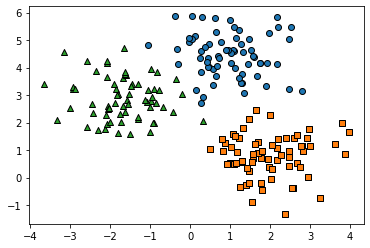

In [29]:
# make_blobs 만들어진 데이터 시각화
target_list=np.unique(y)

# 각 target별 scatter plot의 matrix marker값들

markers=['o','s','^','P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0,target==1,target==2 로 scatter plot 을 marker 별로 생성

for target in target_list:
    target_cluster= clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolors='k',marker=markers[target])

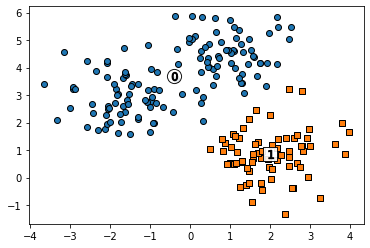

target  kmeans_label
0       0               65
        1                2
1       1               67
2       0               66
Name: kmeans_label, dtype: int64


In [31]:
# K-means 군집화 수행하고 개별 클러스터의 군집 중심 시각화

# KMeans 객체를 이용하여 x 데이터를 K-means 클러스터링 수행
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster centers는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color = 'white', alpha=0.9, edgecolors='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color = 'k', edgecolors='k', marker='$%d$'%label)

plt.show()
print(clusterDF.groupby('target')['kmeans_label'].value_counts())